In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import geopandas as gdp


In [2]:
path_setp = 'data/boundary/setp_zhao2022.gpkg'
path_rgi60_13 = 'data/land-cover/rgi60/rgi60_13.gpkg'
path_rgi60_15 = 'data/land-cover/rgi60/rgi60_15.gpkg'
path_rgi60_setp = 'data/land-cover/rgi60/rgi60_13_setp.shp'
path_rgi60_setp = 'data/land-cover/rgi60/rgi60_setp.shp'
path_rgi60_setp_area_le_4 = 'data/land-cover/rgi60/rgi60_setp_area_le_4.shp'


In [3]:
setp = gdp.read_file(path_setp)
rgi60_13 = gdp.read_file(path_rgi60_13)
rgi60_15 = gdp.read_file(path_rgi60_15)
rgi60_15.head()


,RGIId,GLIMSId,BgnDate,EndDate,CenLon,CenLat,O1Region,O2Region,Area,Zmin,...,Aspect,Lmax,Status,Connect,Form,TermType,Surging,Linkages,Name,geometry
0,RGI60-15.00001,G102044E29941N,19990920,-9999999,102.044042,29.941000,15,3,0.438,4996,...,251,850,0,0,0,0,9,9,None,"MULTIPOLYGON (((102.03759 29.93828, 102.03759 ..."
1,RGI60-15.00002,G102042E29987N,19990920,-9999999,102.042346,29.987019,15,3,0.644,4947,...,244,1021,0,0,0,0,9,9,None,"MULTIPOLYGON (((102.04195 29.99030, 102.04197 ..."
2,RGI60-15.00003,G102041E29997N,19990920,-9999999,102.041130,29.997311,15,3,0.225,5019,...,274,812,0,0,0,0,9,9,None,"MULTIPOLYGON (((102.03710 29.99774, 102.03719 ..."
3,RGI60-15.00004,G102050E29962N,19990920,-9999999,102.050283,29.962297,15,3,0.985,4622,...,52,2318,0,0,0,0,9,9,None,"MULTIPOLYGON (((102.04309 29.95992, 102.04315 ..."
4,RGI60-15.00005,G102044E30025N,19990920,-9999999,102.043728,30.025101,15,3,0.465,4733,...,20,913,0,0,0,0,9,9,None,"MULTIPOLYGON (((102.04765 30.02514, 102.04741 ..."


<AxesSubplot: >

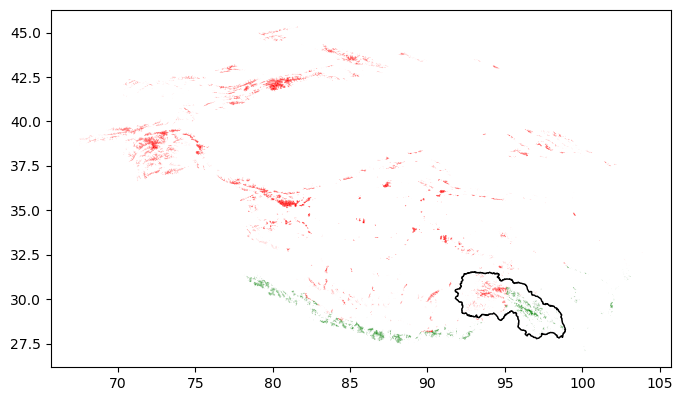

In [4]:
fig, ax = plt.subplots(1,1,figsize=(8,6))
setp.plot(ax=ax,color='white', edgecolor='black')
rgi60_13.plot(ax=ax, color='red')
rgi60_15.plot(ax=ax, color='green')


### Selecting the glaciers of the setp region.

In [5]:
ids_rgi60_13_setp = setp['geometry'][0].contains(rgi60_13['geometry'])
ids_rgi60_15_setp = setp['geometry'][0].contains(rgi60_15['geometry'])
rgi60_13_setp = rgi60_13.loc[ids_rgi60_13_setp][['RGIId', 'Area', 'CenLon', 'CenLat', 'geometry']]
rgi60_15_setp = rgi60_15.loc[ids_rgi60_15_setp][['RGIId', 'Area', 'CenLon', 'CenLat', 'geometry']]
rgi60_13_setp.head()


,RGIId,Area,CenLon,CenLat,geometry
606,RGI60-13.00607,0.439,94.497482,30.144478,"MULTIPOLYGON (((94.49709 30.14096, 94.49658 30..."
607,RGI60-13.00608,0.056,94.295682,30.045959,"MULTIPOLYGON (((94.29498 30.04706, 94.29556 30..."
608,RGI60-13.00609,0.188,94.294062,30.062443,"MULTIPOLYGON (((94.29346 30.06500, 94.29398 30..."
609,RGI60-13.00610,0.123,94.297750,30.056639,"MULTIPOLYGON (((94.29850 30.05419, 94.29798 30..."
610,RGI60-13.00611,2.035,94.297646,30.361333,"MULTIPOLYGON (((94.29325 30.36430, 94.29340 30..."


7260.328

In [11]:
rgi60_setp = pd.concat([rgi60_13_setp, rgi60_15_setp])
print('number of glaciers:', rgi60_setp.shape[0])
print('area of glaciers:', rgi60_setp['Area'].sum())
rgi60_setp.head()



number of glaciers: 7756
area of glaciers: 7260.328


,RGIId,Area,CenLon,CenLat,geometry
606,RGI60-13.00607,0.439,94.497482,30.144478,"MULTIPOLYGON (((94.49709 30.14096, 94.49658 30..."
607,RGI60-13.00608,0.056,94.295682,30.045959,"MULTIPOLYGON (((94.29498 30.04706, 94.29556 30..."
608,RGI60-13.00609,0.188,94.294062,30.062443,"MULTIPOLYGON (((94.29346 30.06500, 94.29398 30..."
609,RGI60-13.00610,0.123,94.297750,30.056639,"MULTIPOLYGON (((94.29850 30.05419, 94.29798 30..."
610,RGI60-13.00611,2.035,94.297646,30.361333,"MULTIPOLYGON (((94.29325 30.36430, 94.29340 30..."


<AxesSubplot: >

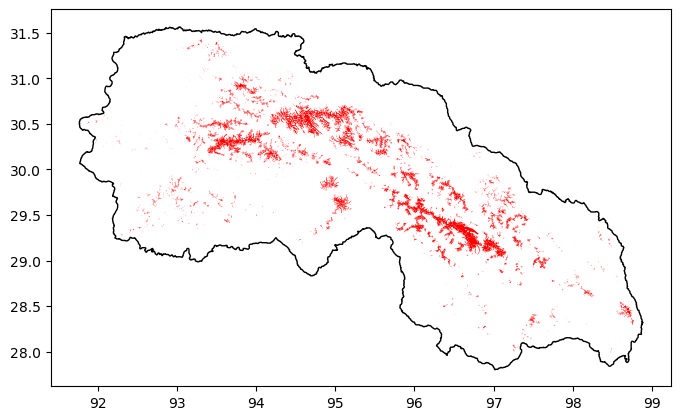

In [135]:
fig, ax = plt.subplots(1,1,figsize=(8,6))
setp.plot(ax=ax, color='white', edgecolor='black')
rgi60_setp.plot(ax=ax, color='red')


### Select the glaciers which area > 4 $km^2$ 

In [136]:
ids_area_sel = np.where(rgi60_setp['Area']>4)[0]
rgi60_setp_sel = rgi60_setp.iloc[ids_area_sel]
print('number of glaciers:', len(ids_area_sel))
print('Overall area and percentage of the selected glaciers: \n', \
                rgi60_setp_sel['Area'].sum(), rgi60_setp_sel['Area'].sum()/rgi60_setp['Area'].sum())



number of glaciers: 301
Overall area and percentage of the selected glaciers: 
 3638.23 0.5011109690912036


Text(0.5, 1.0, 'glaicer area > 4 $km^2$')

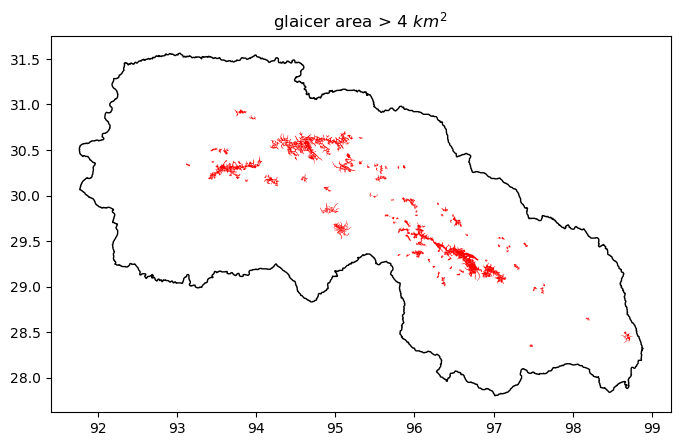

In [137]:
fig, ax = plt.subplots(1,1,figsize=(8,6))
setp.plot(ax=ax, color='white', edgecolor='black')
rgi60_setp_sel.plot(ax=ax, color='red')
ax.set_title('glaicer area > 4 $km^2$')


### Write out

In [141]:
rgi60_setp.to_file(path_rgi60_setp)
rgi60_setp_sel.to_file(path_rgi60_setp_area_le_4)

